In [1]:
from google.colab import files
up=files.upload()

Saving Dataset.zip to Dataset.zip


In [2]:
!unzip Dataset.zip 

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/test/
  inflating: Dataset/test/batmanjoker_1.jpeg  
  inflating: Dataset/test/batmanjoker_2.jpeg  
  inflating: Dataset/test/batmanjoker_3.jpeg  
  inflating: Dataset/test/batmanjoker_4.jpeg  
  inflating: Dataset/test/batmanjoker_5.jpeg  
  inflating: Dataset/test/thanosMarvelMovie_1.jpeg  
  inflating: Dataset/test/thanosMarvelMovie_2.jpeg  
  inflating: Dataset/test/thanosMarvelMovie_3.jpeg  
  inflating: Dataset/test/thanosMarvelMovie_4.jpeg  
  inflating: Dataset/test/thanosMarvelMovie_5.jpeg  
   creating: Dataset/train/
   creating: Dataset/train/joker/
  inflating: Dataset/train/joker/batmanjokerheathledger_1.jpeg  
  inflating: Dataset/train/joker/batmanjokerheathledger_10.jpeg  
  inflating: Dataset/train/joker/batmanjokerheathledger_11.jpeg  
  inflating: Dataset/train/joker/batmanjokerheathledger_12.jpeg  
  inflating: Dataset/train/joker/batmanjokerheathledger_13.jpeg  
  inflating: Dataset/train/joker/batma

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


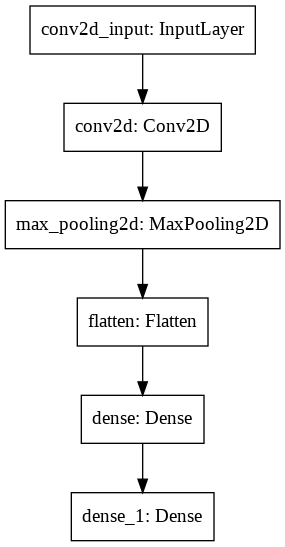

In [8]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    
    dpi=96,
)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 8,
                                                 class_mode = 'binary')
val_set = test_datagen.flow_from_directory('Dataset/val',
                                            target_size = (64, 64),
                                            batch_size = 8,
                                            class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [16]:

history=model.fit_generator(training_set,
                         steps_per_epoch = 8,
                         epochs = 30,
                         validation_data = val_set,
                         validation_steps = 2)

Epoch 1/30
8/8 [==============================] - 2s 247ms/step - loss: 1.5358 - accuracy: 0.4219 - val_loss: 0.7675 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 2s 218ms/step - loss: 0.8636 - accuracy: 0.4531 - val_loss: 0.5760 - val_accuracy: 0.7500
Epoch 3/30
8/8 [==============================] - 2s 219ms/step - loss: 0.6328 - accuracy: 0.6406 - val_loss: 0.5661 - val_accuracy: 0.7500
Epoch 4/30
8/8 [==============================] - 2s 205ms/step - loss: 0.6484 - accuracy: 0.6094 - val_loss: 0.5654 - val_accuracy: 0.7500
Epoch 5/30
8/8 [==============================] - 2s 216ms/step - loss: 0.5961 - accuracy: 0.7344 - val_loss: 0.5392 - val_accuracy: 0.8750
Epoch 6/30
8/8 [==============================] - 2s 201ms/step - loss: 0.5943 - accuracy: 0.7500 - val_loss: 0.4476 - val_accuracy: 0.8750
Epoch 7/30
8/8 [==============================] - 2s 216ms/step - loss: 0.5753 - accuracy: 0.7188 - val_loss: 0.4135 - val_accuracy: 0.8750
Epoch 8/30
8/8 [====

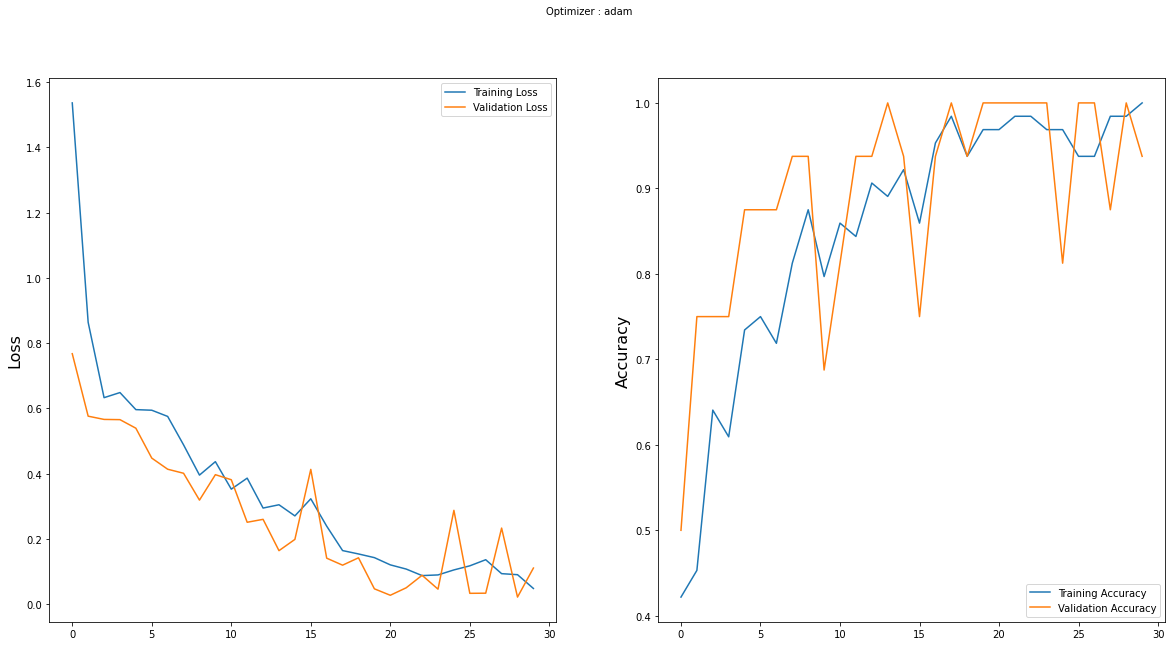

In [17]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pred=model.predict(validation_generator,verbose=1,steps=len(validation_generator))

In [21]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Dataset/test',
    target_size=(50,50),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False
)

In [22]:
from keras.models import model_from_json
import numpy as np
from keras.preprocessing import image

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
print("Loaded model from disk")



Loaded model from disk


In [25]:
def classify(img_file):
    img_name = img_file
    test_image = image.load_img(img_name, target_size = (64, 64))

    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)

    if result[0][0] == 1:
        prediction = 'Classification result:Thanos,filename is :'
    else:
        prediction = 'Classification result:Joker,filename is :'
    print(prediction,img_name)




In [26]:
import os
path = '/content/Dataset/test'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
   for file in f:
     if '.jpeg' in file:
       files.append(os.path.join(r, file))

for f in files:
   classify(f)
   print('\n')

Classification result:Joker,filename is : /content/Dataset/test/batmanjoker_4.jpeg


Classification result:Thanos,filename is : /content/Dataset/test/thanosMarvelMovie_4.jpeg


Classification result:Joker,filename is : /content/Dataset/test/thanosMarvelMovie_3.jpeg


Classification result:Thanos,filename is : /content/Dataset/test/batmanjoker_1.jpeg


Classification result:Thanos,filename is : /content/Dataset/test/batmanjoker_5.jpeg


Classification result:Joker,filename is : /content/Dataset/test/batmanjoker_2.jpeg


Classification result:Thanos,filename is : /content/Dataset/test/thanosMarvelMovie_1.jpeg


Classification result:Joker,filename is : /content/Dataset/test/thanosMarvelMovie_5.jpeg


Classification result:Joker,filename is : /content/Dataset/test/batmanjoker_3.jpeg


Classification result:Joker,filename is : /content/Dataset/test/thanosMarvelMovie_2.jpeg


